In [301]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn.apionly as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.simplefilter("ignore")

import theano
import theano.tensor as T

In [405]:
n = 1
sgd = True

In [406]:
def powerme(x1,x2,n):
    X = []
    for m in range(n+1):
        for i in range(m+1):
            X.append(np.multiply(np.power(x1,i),np.power(x2,(m-i))))
    return np.hstack(X)

data = np.matrix(np.loadtxt("../part01/ex2data2.txt",delimiter=","))
np.random.shuffle(data)

X = powerme(data[:,0], data[:,1], n)
Y = data[:,2]

print(X[:5,:])

[[ 1.         0.7288     0.61578  ]
 [ 1.        -0.19225   -0.30588  ]
 [ 1.         0.39985   -0.0063364]
 [ 1.        -0.53582    0.46601  ]
 [ 1.         0.034357  -0.39804  ]]


In [407]:
def logistic(x):
    return 1.0 / (1.0 + T.exp(-x))

def graph_logreg(X):
    idim = X.shape[1]
    odim = 1
    
    x = T.dmatrix("x")
    y = T.dmatrix("y")

    theta = theano.shared(np.random.randn(idim, odim), name='w')

    # the model
    prob = logistic(T.dot(x, theta))

    # the decision function
    pred = prob > 0.5                    

    # the cost function
    xent = -y * T.log(prob) - (1 - y) * T.log(1 - prob) 
    cost = xent.mean()

    # the gradients
    gtheta = T.grad(cost, theta)

    # the learning rate
    alpha = T.scalar("alpha")
    # the SGD update rule
    update = theano.function(
          inputs=[x, y, alpha],
          outputs=[cost, theta],
          updates=[[theta, theta - alpha * gtheta]])

    # application of the model to input
    predict = theano.function(inputs=[x], outputs=pred)
    
    return update, predict

In [408]:
def mbSGD(update_rule, X, y, 
         alpha=0.01, maxSteps=10000, batchSize = 10):
    i = 0
    b = batchSize
    m = X.shape[0]
    while i < maxSteps:
        start = (i*b) % m
        end   = ((i+1)*b) % m
        if(end <= start):
            end = m
        XBatch = X[start:end]
        YBatch = y[start:end]
        
        out = update_rule(XBatch, YBatch, alpha)
        i += 1
    return out[1:]

[[-0.05634255]
 [ 0.01656006]
 [-0.1338971 ]]


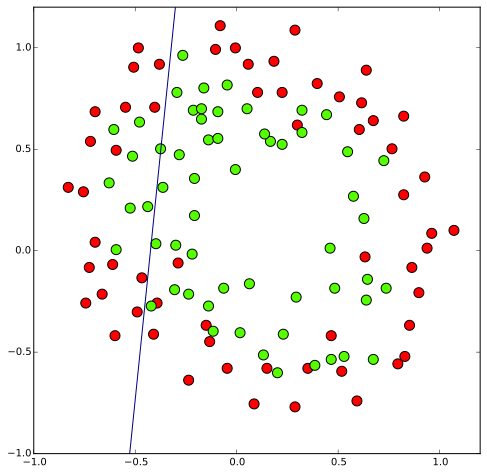

In [409]:
pl.figure(figsize=(8,8))
pl.scatter(X[:,2].tolist(),
               X[:,1].tolist(),
               c=Y.tolist(),
               s=100, cmap=pl.cm.get_cmap('prism'));


if sgd:
    xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.001),
                         np.arange(-1.5, 1.5, 0.001))
    
    update, predict = graph_logreg(X)
    
    thetaBest = mbSGD(update, X, Y,
                  alpha=0.1, maxSteps=30000, batchSize = 20)
    for p in thetaBest:
        print(p)
    
    l = len(xx.ravel())
    C = powerme(xx.reshape(l,1),yy.reshape(l,1),n)
    z = predict(C).reshape(np.sqrt(l),np.sqrt(l))

    cont = pl.contour(xx, yy, z, levels=[0.5], lw=5);
    
pl.ylim(-1,1.2);
pl.xlim(-1,1.2);
pl.legend();

In [412]:
def graph_mlp(X):
    idim = X.shape[1]
    hdim = 3
    odim = 1
    
    x = T.dmatrix("x")
    y = T.dmatrix("y")

    theta1 = theano.shared(np.random.randn(idim, hdim), name='w1')
    theta2 = theano.shared(np.random.randn(hdim, odim), name='w2')

    # the model
    
    lay1 = logistic(T.dot(x, theta1))
    prob = logistic(T.dot(lay1, theta2))

    # the decision function
    pred = prob > 0.5                    

    # the cost function
    xent = -y * T.log(prob) - (1 - y) * T.log(1 - prob) 
    cost = xent.mean()

    # the gradients
    gtheta1, gtheta2 = T.grad(cost, [theta1, theta2])

    # the learning rate
    alpha = T.scalar("alpha")
    # the SGD update rule
    update = theano.function(
          inputs=[x, y, alpha],
          outputs=[cost, theta1, theta2],
          updates=[[theta1, theta1 - alpha * gtheta1],
                  [theta2, theta2 - alpha * gtheta2]])

    # application of the model to input
    predict = theano.function(inputs=[x], outputs=pred)
    
    return update, predict

[[-4.01738074  1.04403884 -1.79663236]
 [ 4.52176509  6.2388648   1.32964328]
 [ 6.19184042  0.0329994  -3.64945032]]
[[-11.21487945]
 [  9.69732166]
 [-13.17425663]]


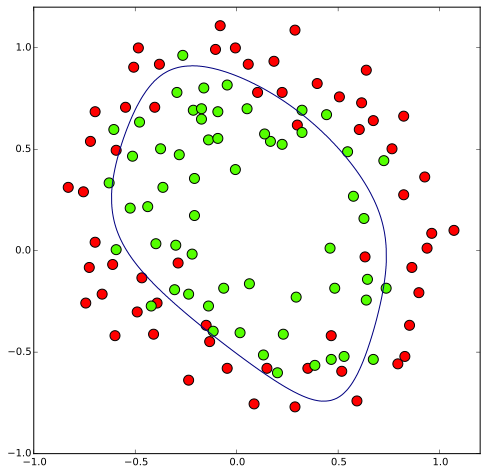

In [413]:
pl.figure(figsize=(8,8))
pl.scatter(X[:,2].tolist(),
               X[:,1].tolist(),
               c=Y.tolist(),
               s=100, cmap=pl.cm.get_cmap('prism'));


if sgd:
    xx, yy = np.meshgrid(np.arange(-1.5, 1.5, 0.001),
                         np.arange(-1.5, 1.5, 0.001))
    
    update, predict = graph_mlp(X)
    
    thetaBest = mbSGD(update, X, Y,
                  alpha=0.1, maxSteps=30000, batchSize = 20)
    for p in thetaBest:
        print(p)
    
    l = len(xx.ravel())
    C = powerme(xx.reshape(l,1),yy.reshape(l,1),n)
    z = predict(C).reshape(np.sqrt(l),np.sqrt(l))

    cont = pl.contour(xx, yy, z, levels=[0.5], lw=5);
    
pl.ylim(-1,1.2);
pl.xlim(-1,1.2);
pl.legend();